In [43]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [44]:
All_School_List = pd.read_csv('Data/All_School_List.csv')
Migrant_School_List = pd.read_csv('Data/Migrant_School_List.csv')
All_School_List =  All_School_List.drop(['County Name','District Name'],axis=1)
Migrant_School_List =  Migrant_School_List.drop(['County Name','District Name'],axis=1)
Migrant_School_List.head(1)

,Unnamed: 0,Mean Scale Score,School Code,District Code,Zip Code,Total_Students,Per_Student_Spending,Median,Mean,Pop,YearsTeaching,Enrolled,Utilized,Percent_Eligible,Percent_Utilized,Sanctuary
0,0,2446.35,6009690,63560,93307,2958.4,10666.62,35780.0,43139.0,82658.0,11.230769,625,601,0.96,0.9616,0.0


****

## Statistical Inference

Previously, rough correlations between our features and our target **Mean Scale Score**

Evaluate how signifigant these relationships are in relation to the variance of the schools.

**Goals**


**1.Evaluate the relationship between money and student scores**
+ The data has three metrics that are all correlated with household incomes for the students at each school
+ ask which of these is most correlated student scores

**2.Hunger and Meal Assistance**
+ The data contains information on which schools have the greatest number of student eligibile for meal assistance
+ Ask whether the percent of eliligible students is a useful indicator, how does the rate at which eligible students actually apply effect student outcomes.

**3. Teacher Demographics**
+ a visual relationship between average years of instruction and student scores has already been observed visually, identify how strong this relationship is.



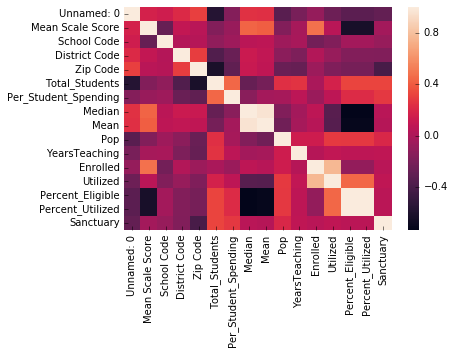

In [45]:
# A general overveiw of the features
All_Corr = All_School_List.corr()
Migrant_Corr = Migrant_School_List.corr()
sns.heatmap(All_Corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

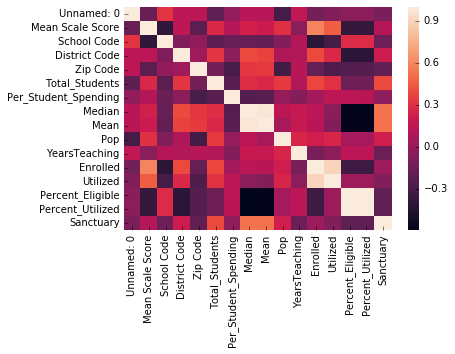

In [46]:
sns.heatmap(Migrant_Corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Looking Across the top row, it is clear that the front runners for correlation with scores are mean income, median income and the number of students enrolled.

one key diffience between the two graphs is that migrant scores are much for influenced my meal assistance than the general population

**1.Evaluate the relationship between money and student scores**
+ Area Mean Income
+ Area Median Income, potentially less influenced by extreme individuals who are likely not representitive of the migrant population of interest.
+ Per Student Spending, will be most indicative of the amount the schools budget for thier students.

In [47]:
#
All_Corr.loc[['Median','Mean','Per_Student_Spending'],['Mean Scale Score']]

,Mean Scale Score
Median,0.431691
Mean,0.417219
Per_Student_Spending,-0.076194


In [48]:
Migrant_Corr.loc[['Median','Mean','Per_Student_Spending'],['Mean Scale Score']]

,Mean Scale Score
Median,0.230929
Mean,0.199853
Per_Student_Spending,0.110089


**The intuition that Median would be a closer correlate were true. The results of per student spending are also interesting, differences in school funding is paradoxically resposible for very little of the variation in school performance. Per student spending is calculated at the district level and the income is gathered at the zipcode level. It is possible the main factor effecting the reliability of these metrics is that they describe too large an area and that greater knowlege of the economic differences of these schools would provide more accurate modeling.**

**1.Hunger and Meal Assistance**
+ Higher rates of eligibility for Meal assistance could be a school level indicator of economic enviroment.
+ In the description of this program given by policy makers, we would ideally see that schools that needed this program and utilized it are doing better than schools that needed it and did not utilize


In [56]:
#Looking at how policies that provide free meals effect educational outcomes of migrant students and the general population
All_Corr.loc[['Utilized','Percent_Eligible','Percent_Utilized'],['Mean Scale Score']]

,Mean Scale Score
Utilized,0.057043
Percent_Eligible,-0.621913
Percent_Utilized,-0.621904


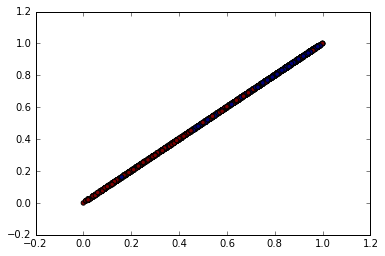

In [67]:
plt.scatter(All_School_List['Percent_Eligible'],All_School_List['Percent_Utilized'], c=All_School_List['Mean Scale Score']>np.percentile(All_School_List['Mean Scale Score'],50), alpha=1,)

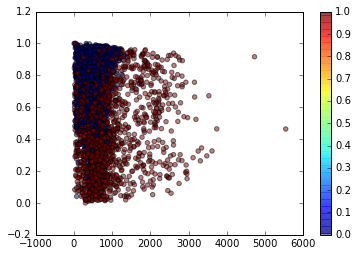

In [65]:
plt.scatter(All_School_List['Enrolled'],All_School_List['Percent_Utilized'], c=All_School_List['Mean Scale Score']>np.percentile(All_School_List['Mean Scale Score'],50), alpha=.5,)
plt.colorbar()
plt.show()

** there is no signifigant number of schools for which the nutrition program is being under utilized**

**on both graphs we see that most of the upper precentile schools are more concentrated at the lower ends of utilization.**

** it is important to note that there are high and low performing schools on both ends of the spectrum**

** The higher performing school is more likely to be found with a greater number of students and less meal assistance eligibility **

** When average years of experience was last visualized with scores it apearred that schools with teachers closer to the mean years of experience had a slighly higher average**

14.3216943178


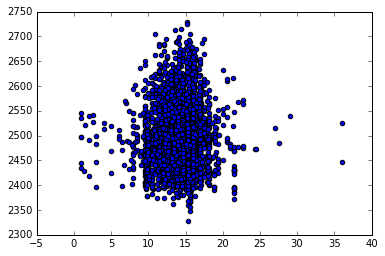

In [69]:
_=plt.scatter(All_School_List['YearsTeaching'],All_School_List['Mean Scale Score'])
print(All_School_List['YearsTeaching'].mean())

13.1868616975


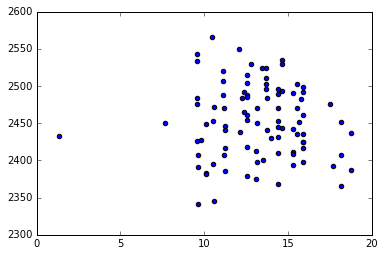

In [70]:
_=plt.scatter(Migrant_School_List['YearsTeaching'],Migrant_School_List['Mean Scale Score'])
print(Migrant_School_List['YearsTeaching'].mean())